# <center>**Jurnal Modul 3**</center>
## <center>(Tranformasi Wavelet)</center>
##### Nama : Rizki Rahman Maulana
##### NIM : F1D022093

#### **Mengimport library**

In [280]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

Terlebih dahulu lakukan import library numpy untuk melakukan operasi numerik , cv2 untuk melakukan pengolahan citra dan matplotlib untuk visualisasi data.

#### **Mendefinisikan Kernel**

In [281]:
#berfungsi untuk mendefinisikan sebuah kernel yang akan digunakan
low_dek = np.array([0.7, 0.7])
high_dek = np.array([-0.7, 0.7])

Kode di atas mendefinisikan dua kernel yang akan digunakan dalam suatu proses, masing-masing disimpan sebagai array numpy. Kernel pertama memiliki nilai [0.7, 0.7] yang merepresentasikan koordinat titik dalam ruang, sedangkan kernel kedua memiliki nilai [-0.7, 0.7]. Kernels ini mungkin digunakan dalam konteks seperti pemrosesan citra atau pengolahan sinyal untuk operasi seperti deteksi tepi atau konvolusi.

#### **Mengimport gambar**


Kode dibawah berfungsi membaca gambar "IoriYagami.jpg", mengubahnya menjadi citra skala abu-abu menggunakan OpenCV, dan kemudian menampilkannya menggunakan matplotlib. Hasil dari transformasi ini kemudian dicetak sebagai array nilai piksel citra.

[[156 157 158 ... 156 157 158]
 [156 157 158 ... 156 157 158]
 [156 157 158 ... 156 157 158]
 ...
 [157 157 157 ... 156 157 158]
 [157 157 157 ... 156 157 158]
 [157 157 157 ... 156 157 158]]


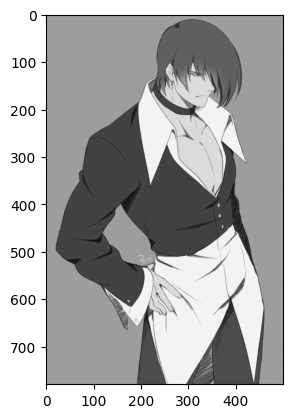

In [282]:
IoriYagami = plt.imread("IoriYagami.jpg",0)
IoriYagami = cv.cvtColor(IoriYagami,cv.COLOR_BGR2GRAY)
plt.imshow(IoriYagami,cmap='gray')
print(IoriYagami)

#### **Menginisialisasi Fungsi-fungsi**

In [283]:
#fungsi ini akan mengembaalikan gambar hasil padding dengan ukuran yang telah ditambahkan sesuai dengan jumlah padding yang diberikan
def padding (hasil, n_pad):
    n_pad = len(n_pad)-1
    padd = np.pad (hasil , [0, n_pad], 'constant')
    
    return padd

Fungsi padding mengambil citra hasil dan jumlah padding n_pad, lalu menambahkan padding di sekitar citra dengan ukuran yang disesuaikan sesuai jumlah padding yang diberikan. Nilai padding dihitung berdasarkan panjang n_pad dikurangi satu, dan citra hasil padding kemudian dikembalikan.

In [284]:
#Konvolusi setiap baris
def konvoBar (padd, filter, hasil):
    baris, kolom =  hasil.shape
    konvo = np.zeros ((baris,kolom))
    for i in range (len(konvo)):
        for j in range (len(konvo[i])):
            for x in range (len(filter)):
                konvo[i][j] += (padd[i][j+x]*filter[x])

    return konvo


Fungsi konvoBar melakukan konvolusi pada setiap baris citra hasil padding padd menggunakan filter yang diberikan. Looping dilakukan untuk setiap baris dan kolom dalam citra hasil, kemudian nilai konvolusi dihitung dengan mengalikan setiap elemen filter dengan elemen yang sesuai dalam citra hasil padding, dan hasilnya disimpan dalam matriks konvo. Hasil konvolusi dari setiap baris kemudian dikembalikan.

In [285]:
#konvolusi setiap kolom
def konvoKol (padd, filter, hasil):
    baris, kolom =  hasil.shape
    konvo = np.zeros ((baris,kolom))
    for i in range (len(konvo)):
        for j in range (len(konvo[i])):
            for x in range (len(filter)):
                konvo[i][j] += (padd[i+x][j]*filter[x])

    return konvo


Fungsi konvoKol melakukan konvolusi pada setiap kolom citra hasil padding padd menggunakan filter yang diberikan. Looping dilakukan untuk setiap baris dan kolom dalam citra hasil, kemudian nilai konvolusi dihitung dengan mengalikan setiap elemen filter dengan elemen yang sesuai dalam citra hasil padding, dan hasilnya disimpan dalam matriks konvo. Hasil konvolusi dari setiap kolom kemudian dikembalikan.

In [286]:
#memindahkan nilaai dari setiap kolom ke kolom dengan indeks genap
def downKol (mat_konvo):
    baris,kolom = mat_konvo.shape
    baris=int(baris)
    kolom=int(kolom/2)
    Genap = np.zeros((baris,kolom))   
    for i in range(baris):
        x = 0
        for j in range(kolom):
            Genap[i][j] = mat_konvo[i][x]
            x += 2
            
    return Genap


Fungsi downKol mengambil matriks hasil konvolusi mat_konvo dan memindahkan nilai dari setiap kolom ke kolom dengan indeks genap. Matriks hasil memiliki ukuran yang sama dengan matriks input, tetapi hanya setiap kolom dengan indeks genap yang diambil nilainya. Hasil akhir kemudian dikembalikan sebagai matriks Genap.

In [287]:
#melakukan proses subsampling
def downBar (mat_konvo):
    baris,kolom=mat_konvo.shape
    baris=int(baris/2)
    kolom=int(kolom)
    Genap = np.zeros((baris,kolom))
    x = 0

    for i in range(baris):
        for j in range(kolom):
            Genap[i][j] = mat_konvo[x][j]
        x += 2
        
    return Genap


Fungsi downBar mengambil matriks hasil konvolusi mat_konvo dan melakukan proses subsampling dengan mengambil setiap baris dengan indeks genap. Matriks hasil memiliki setengah dari jumlah baris matriks input dan tetap mempertahankan jumlah kolom yang sama. Nilai dari setiap baris dengan indeks genap diambil dari matriks input. Hasil akhir kemudian dikembalikan sebagai matriks Genap.

In [288]:
 def dekomposisi(hasil, f1, f2, level):
        if level == 0:
            return hasil
        pad = padding(hasil, f1)
        konvolusi_baris = konvoBar(pad, f1, hasil)
        downsampling_baris = downKol(konvolusi_baris)
        pad_kolom = padding(downsampling_baris, f2)
        konvolusi_kolom = konvoKol(pad_kolom, f2, downsampling_baris)
        downsampling_kolom = downBar(konvolusi_kolom)
        return dekomposisi(downsampling_kolom, f1, f2, level - 1)

Fungsi dekomposisi melakukan dekomposisi citra dengan metode pengurangan resolusi multilevel menggunakan filter f1 dan f2. Pada setiap level, citra di-padding menggunakan f1, kemudian dilakukan konvolusi baris dan downsampling. Selanjutnya, hasil downsampling tersebut di-padding dengan f2, dilakukan konvolusi kolom, dan dilakukan downsampling kolom. Proses ini diulang sebanyak level yang ditentukan, dan hasil akhirnya adalah citra yang telah didekomposisi.

In [289]:
def normalize(image):
    image_min = np.min(image)
    image_max = np.max(image)
    return (image - image_min) / (image_max - image_min) * 255

Fungsi normalize mengambil citra sebagai input dan menghitung nilai minimum dan maksimum dalam citra menggunakan numpy. Selanjutnya, citra dinormalisasi agar nilainya berada dalam rentang 0 hingga 255, dengan menggunakan rumus standar normalisasi. Hasil normalisasi kemudian dikembalikan sebagai citra yang telah dinormalisasi.

In [290]:
def rekonstruksi(down1, down2, down3, down4):
    timage, limage = down1.shape
    t = timage * 2
    l = limage * 2 
    image = np.zeros([t, l]) 
    Aproximation_norm = np.zeros([t, l])
    Horizontal_norm = np.zeros([t, l])
    Vertical_norm = np.zeros([t, l])
    Diagonal_norm = np.zeros([t, l])
    
    for i in range(0, timage, 2):
        for j in range(0, limage, 2):
            Aproximation_norm[2*i][2*j] = down1[i][j]
            Horizontal_norm[2*i][2*j] = down2[i][j]
            Vertical_norm[2*i][2*j] = down3[i][j]
            Diagonal_norm[2*i][2*j] = down4[i][j]
    
    for i in range(1, t, 2):
        for j in range(l):
            Aproximation_norm[i][j] = Aproximation_norm[i-1][j]
            Horizontal_norm[i][j] -= Vertical_norm[i-1][j]
            Vertical_norm[i][j] = Horizontal_norm[i-1][j]
            Diagonal_norm[i][j] -= Diagonal_norm[i-1][j]
    
    for i in range(t):
        for j in range(1, l, 2):
            Aproximation_norm[i][j] = Aproximation_norm[i][j-1]
            Horizontal_norm[i][j] = Vertical_norm[i][j-1]
            Vertical_norm[i][j] -= Horizontal_norm[i][j-1]
            Diagonal_norm[i][j] -= Diagonal_norm[i][j-1]
    
    for i in range(t):
        for j in range(l):
            image[i][j] += (Aproximation_norm[i][j] + Horizontal_norm[i][j] + Vertical_norm[i][j] + Diagonal_norm[i][j])
    return image


Kode tersebut mengimplementasikan proses rekonstruksi citra dari hasil dekomposisi menggunakan metode wavelet. Dengan menghitung ukuran citra rekonstruksi baru yang dua kali lipat dari citra asli, empat matriks kosong dibuat untuk menampung komponen aproksimasi, detail horizontal, vertikal, dan diagonal. Setiap komponen diisi dengan nilai-nilai dari citra hasil downsampling yang telah dinormalisasi, mengikuti pola yang sesuai. Melalui operasi pengisian nilai pada setiap piksel untuk membangun komponen citra dan memulihkan relasi antar komponen yang didekomposisi, citra rekonstruksi akhirnya diperoleh dengan menjumlahkan komponen-komponen tersebut secara bertahap untuk setiap piksel dalam citra rekonstruksi. Proses ini memungkinkan pengembalian citra asli dari informasi yang telah terdekomposisi sebelumnya.

In [291]:
def combine_images(images, nrows, ncols):
    row_images = []
    for r in range(nrows):
        row_images.append(np.concatenate(images[r*ncols:(r+1)*ncols], axis=1))
    
    combined_image = np.concatenate(row_images, axis=0)
    return combined_image

Kode combine_images menggabungkan beberapa citra menjadi satu citra tunggal dalam bentuk grid. Proses dimulai dengan membangun setiap baris citra yang akan digabungkan dengan menggabungkan beberapa citra dalam satu baris menggunakan np.concatenate. Kemudian, baris-baris citra tersebut digabungkan secara vertikal menjadi satu citra tunggal menggunakan np.concatenate.

### **NOMOR 1**

#### **Melakukan Dekomposisi Citra**

In [292]:
Aproximation = dekomposisi(IoriYagami, low_dek, low_dek,1)
Horizontal = dekomposisi(IoriYagami, low_dek, high_dek,1)
Vertical = dekomposisi(IoriYagami, high_dek, low_dek,1)
Diagonal = dekomposisi(IoriYagami, high_dek, high_dek,1)

# Normalisasi gambar output
Aproximation_norm = normalize(Aproximation)
Horizontal_norm = normalize(Horizontal)
Vertical_norm = normalize(Vertical)
Diagonal_norm = normalize(Diagonal)


Kode tersebut melakukan dekomposisi citra "IoriYagami" ke dalam empat komponen menggunakan filter lowpass dan highpass. Setiap komponen kemudian dinormalisasi menggunakan fungsi normalize sehingga nilainya berada dalam rentang 0 hingga 255.

Kemudian, kode berikut menggabungkan empat citra hasil dekomposisi dan citra rekonstruksi menjadi satu tampilan dengan bantuan combine_images. Hasilnya ditampilkan dalam satu baris, dengan setiap komponen citra (aproksimasi, detail horizontal, vertikal, diagonal, dan hasil rekonstruksi) ditampilkan dalam subplot terpisah.

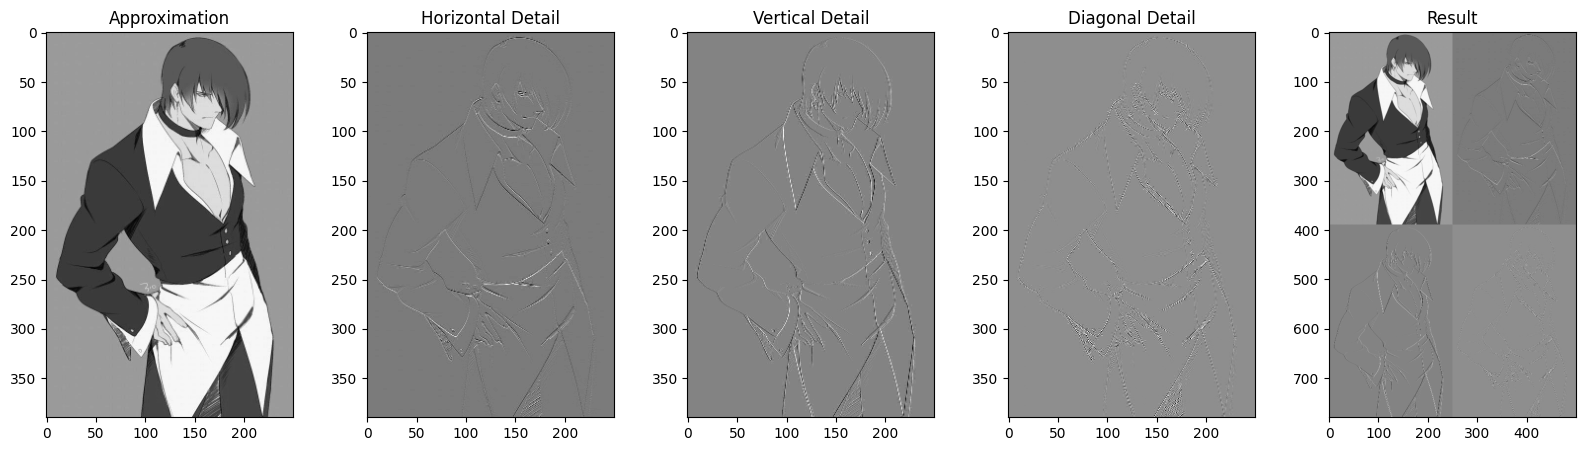

In [293]:
images = [Aproximation_norm, Horizontal_norm, Vertical_norm, Diagonal_norm]
combined_image = combine_images(images, 2, 2)

# Menampilkan hasil
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(Aproximation, cmap='gray'); axs[0].set_title('Approximation');
axs[1].imshow(Horizontal, cmap='gray'); axs[1].set_title('Horizontal Detail');
axs[2].imshow(Vertical, cmap='gray'); axs[2].set_title('Vertical Detail');
axs[3].imshow(Diagonal, cmap='gray'); axs[3].set_title('Diagonal Detail');
axs[4].imshow(combined_image, cmap='gray'); axs[4].set_title('Result');
plt.show()

#### **Menampilkan hasil dekomposisi citra pada level 3, 4, 5 dan seterusnya secara dinamis**


Kode berikut ini dirancang untuk menyajikan citra hasil dekomposisi multi-level dengan detail menggunakan fungsi-fungsi yang saling berinteraksi. Fungsi resize_to_match menyesuaikan ukuran citra agar sesuai, sementara tampilan menggabungkan citra-citra dalam susunan baris dan kolom untuk tampilan yang lebih komprehensif. Fungsi combine_levels kemudian menggabungkan citra-citra dari berbagai level dekomposisi, mempertimbangkan perbedaan ukuran dan menyusunnya dalam bentuk matriks grid yang komprehensif. Dengan demikian, proses ini memungkinkan untuk menyajikan citra hasil dekomposisi dengan cara yang informatif dan mudah dipahami.

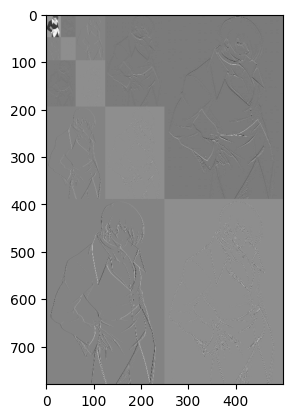

In [294]:

def resize_to_match(image1, image2):
    min_height = min(image1.shape[0], image2.shape[0])
    min_width = min(image1.shape[1], image2.shape[1])
    image1_resized = cv.resize(image1, (min_width, min_height), interpolation=cv.INTER_AREA)
    image2_resized = cv.resize(image2, (min_width, min_height), interpolation=cv.INTER_AREA)
    return image1_resized, image2_resized

def tampilan(LL, LH, HL, HH):
    LL, HL = resize_to_match(LL, HL)
    LH, HH = resize_to_match(LH, HH)
    baris_1 = np.concatenate((LL, HL), axis=1)
    baris_2 = np.concatenate((LH, HH), axis=1)
    result = np.concatenate((baris_1, baris_2), axis=0)
    return result

def combine_levels(levels):
    combined = levels[0]
    for level in levels[1:]:
        if isinstance(level, list):
            resized_images = [resize_to_match(combined, img)[1] for img in level]
            combined = tampilan(combined, *resized_images)
        else:
            combined, level = resize_to_match(combined, level)
            combined = tampilan(combined, level, level, level) 
    return combined

lvl1 = combined_image  
lvl2 = tampilan(lvl1, Horizontal_norm, Vertical_norm, Diagonal_norm)
combined_levels_result = combine_levels([lvl2, [Vertical_norm, Horizontal_norm, Diagonal_norm], [Vertical_norm, Horizontal_norm, Diagonal_norm]])

plt.imshow(combined_levels_result, cmap='gray')
plt.show()


### **NOMOR 2**

#### **Melakukan rekonstruksi dari hasil dekomposisi**

menampilkan hasil dekomposisi citra pada level 3, 4, 5 dan seterusnya secara dinamis

In [295]:
def rekonstruksi(down1, down2, down3, down4):
    timage, limage = down1.shape
    t = timage * 2
    l = limage * 2 
    image = np.zeros([t, l]) 
    Aproximation_norm = np.zeros([t, l])
    Horizontal_norm = np.zeros([t, l])
    Vertical_norm = np.zeros([t, l])
    Diagonal_norm = np.zeros([t, l])
    
    for i in range(0, timage, 2):
        for j in range(0, limage, 2):
            Aproximation_norm[2*i][2*j] = down1[i][j]
            Horizontal_norm[2*i][2*j] = down2[i][j]
            Vertical_norm[2*i][2*j] = down3[i][j]
            Diagonal_norm[2*i][2*j] = down4[i][j]
    
    for i in range(1, t, 2):
        for j in range(l):
            Aproximation_norm[i][j] = Aproximation_norm[i-1][j]
            Horizontal_norm[i][j] -= Vertical_norm[i-1][j]
            Vertical_norm[i][j] = Horizontal_norm[i-1][j]
            Diagonal_norm[i][j] -= Diagonal_norm[i-1][j]
    
    for i in range(t):
        for j in range(1, l, 2):
            Aproximation_norm[i][j] = Aproximation_norm[i][j-1]
            Horizontal_norm[i][j] = Vertical_norm[i][j-1]
            Vertical_norm[i][j] -= Horizontal_norm[i][j-1]
            Diagonal_norm[i][j] -= Diagonal_norm[i][j-1]
    
    for i in range(t):
        for j in range(l):
            image[i][j] += (Aproximation_norm[i][j] + Horizontal_norm[i][j] + Vertical_norm[i][j] + Diagonal_norm[i][j])
    return image


Kode tersebut mengimplementasikan proses rekonstruksi citra dari hasil dekomposisi menggunakan metode wavelet. Proses dimulai dengan menginisialisasi citra rekonstruksi dengan ukuran yang dua kali lipat dari citra asli yang akan direkonstruksi. Empat matriks kosong dibuat untuk menampung komponen aproksimasi, detail horizontal, vertikal, dan diagonal dari citra rekonstruksi. Selanjutnya, setiap komponen dari citra rekonstruksi diisi dengan nilai-nilai yang sesuai dari citra hasil downsampling yang telah dinormalisasi, mengikuti pola yang telah ditetapkan. Proses ini melibatkan langkah-langkah untuk membangun kembali komponen citra dari informasi yang telah terdekomposisi sebelumnya, sehingga menghasilkan citra rekonstruksi akhir.

Kemudian kode berikut berisi fungsi rekonstruksi dipanggil dengan empat variabel citra hasil dekomposisi yang telah dinormalisasi. Kemudian, citra hasil rekonstruksi ditampilkan menggunakan plt.imshow, menampilkan citra yang telah direkonstruksi dalam skala abu-abu.

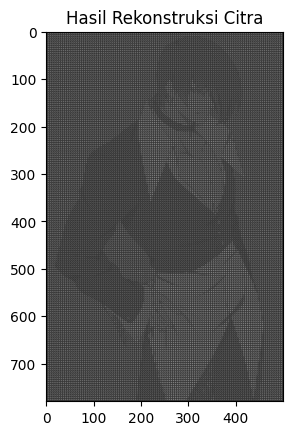

In [296]:
# Panggil fungsi rekonstruksi dengan variabel Aproximation, Horizontal_norm, Vertical_norm, dan Diagonal_norm
hasil_rekonstruksi = rekonstruksi(Aproximation_norm, Horizontal_norm, Vertical_norm, Diagonal_norm)

# Tampilkan hasil rekonstruksi
plt.imshow(hasil_rekonstruksi, cmap='gray')
plt.title("Hasil Rekonstruksi Citra")
plt.show()


### **NOMOR 3**

#### **Level dari dekomposisi**


Fungsi berikut merupakan dekomposisi multi-level citra "IoriYagami" dilakukan dengan enam level menggunakan berbagai filter wavelet. Setiap hasil dekomposisi, baik aproksimasi maupun detail horizontal, vertikal, dan diagonal, ditampilkan dalam subplot terpisah dengan ukuran gambar yang disesuaikan untuk memperlihatkan detail pada setiap level.

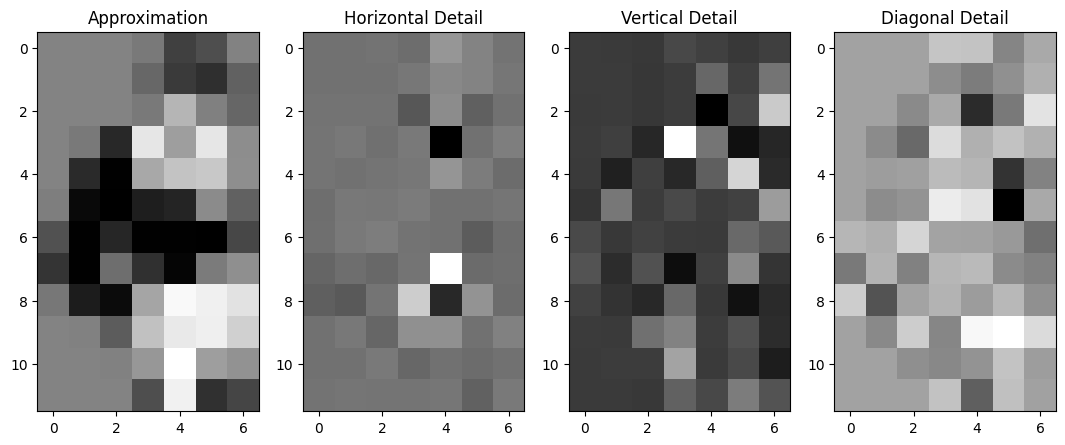

In [297]:
# Jalankan dekomposisi multi-level
Aproximation_mult = dekomposisi(IoriYagami, low_dek, low_dek, 6)
Horizontal_mult = dekomposisi(IoriYagami, low_dek, high_dek, 6)
Vertical_mult = dekomposisi(IoriYagami, high_dek, low_dek, 6)
Diagonal_mult = dekomposisi(IoriYagami, high_dek, high_dek, 6)

plt.figure(figsize=(20,20))
plt.subplot(1,6,1)
plt.title('Approximation')
plt.imshow(Aproximation_mult[:12, :7], cmap="gray")
plt.subplot(1,6,2)
plt.title('Horizontal Detail')
plt.imshow(Horizontal_mult[:12, :7], cmap="gray")
plt.subplot(1,6,3)
plt.title('Vertical Detail')
plt.imshow(Vertical_mult[:12, :7], cmap="gray")
plt.subplot(1,6,4)
plt.title('Diagonal Detail')
plt.imshow(Diagonal_mult[:12, :7], cmap="gray")

### **NOMOR 4**

#### **Menampilkan representasi sinyal pada hasil dekomposisi pada nomor 3**

Sinyal amplitudo diambil dari masing-masing level dekomposisi dan diplot menggunakan plt.plot. Plot menampilkan sinyal amplitudo untuk aproksimasi dengan warna biru. Dengan demikian, visualisasi sinyal amplitudo dari hasil dekomposisi multi-level citra disajikan dengan jelas.

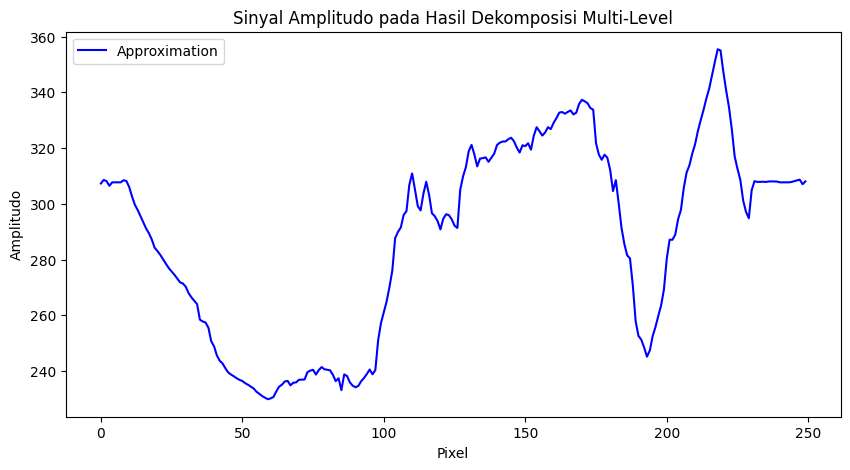

In [298]:
# Ambil nilai absolut dari sinyal pada masing-masing level dekomposisi
amplitudo_aprox = np.abs(Aproximation.mean(axis=0))
amplitudo_hor = np.abs(Horizontal.mean(axis=0))
amplitudo_ver = np.abs(Vertical.mean(axis=0))
amplitudo_diag = np.abs(Diagonal.mean(axis=0))

# Plot sinyal amplitudo
plt.figure(figsize=(10, 5))
plt.plot(amplitudo_aprox, label='Approximation', color='blue')
plt.title('Sinyal Amplitudo pada Hasil Dekomposisi Multi-Level')
plt.xlabel('Pixel')
plt.ylabel('Amplitudo')
plt.legend()
plt.show()


Plot yang dihasilkan menampilkan sinyal amplitudo dari detail horizontal dengan menggunakan warna merah. Dengan demikian, visualisasi sinyal amplitudo dari hasil dekomposisi multi-level citra memberikan informasi yang spesifik tentang komponen horizontal pada citra.

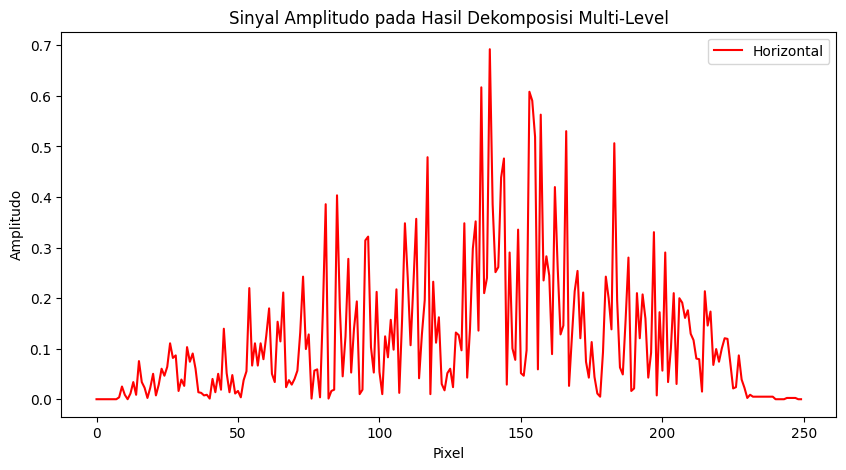

In [299]:
plt.figure(figsize=(10, 5))
plt.plot(amplitudo_hor, label='Horizontal', color='red')
plt.title('Sinyal Amplitudo pada Hasil Dekomposisi Multi-Level')
plt.xlabel('Pixel')
plt.ylabel('Amplitudo')
plt.legend()
plt.show()


Plot yang ditampilkan menunjukkan sinyal amplitudo dari komponen vertikal dengan menggunakan warna hijau. Dengan demikian, plot ini memberikan visualisasi tentang sinyal amplitudo dari hasil dekomposisi multi-level citra untuk komponen vertikal.

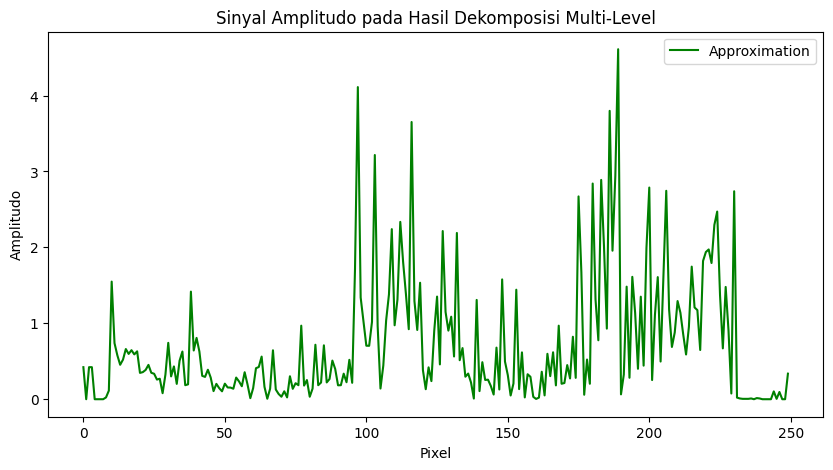

In [300]:
# Plot sinyal amplitudo
plt.figure(figsize=(10, 5))
plt.plot(amplitudo_ver, label='Approximation', color='green')
plt.title('Sinyal Amplitudo pada Hasil Dekomposisi Multi-Level')
plt.xlabel('Pixel')
plt.ylabel('Amplitudo')
plt.legend()
plt.show()

Plot yang ditampilkan menunjukkan sinyal amplitudo dari komponen aproksimasi dengan menggunakan warna abu-abu. Dengan demikian, plot ini memberikan visualisasi tentang sinyal amplitudo dari hasil dekomposisi multi-level citra untuk komponen aproksimasi.

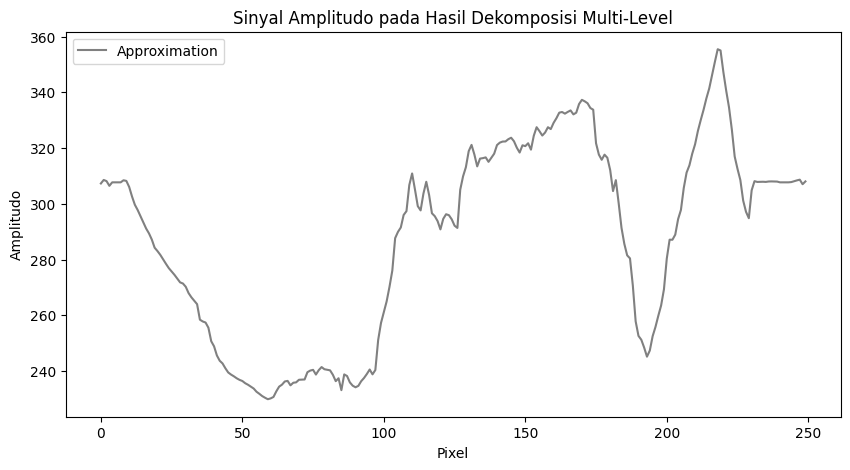

In [301]:
# Plot sinyal amplitudo
plt.figure(figsize=(10, 5))
plt.plot(amplitudo_aprox, label='Approximation', color='gray')
plt.title('Sinyal Amplitudo pada Hasil Dekomposisi Multi-Level')
plt.xlabel('Pixel')
plt.ylabel('Amplitudo')
plt.legend()
plt.show()